### 1. Exploratory Data Analysis (EDA)

Top 10 Artists by Total Streams:
  artist_name  weekly_streams
0   Artist_18      2522419268
1   Artist_20      2520152600
2    Artist_6      2519337476
3   Artist_14      2519298980
4    Artist_5      2517491652
5    Artist_9      2516684532
6   Artist_17      2510268788
7    Artist_4      2509880760
8    Artist_8      2507594344
9    Artist_2      2506011332


/tmp/ipython-input-961043262.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekly_streams', y='artist_name', data=top_artists_streams, palette='viridis')


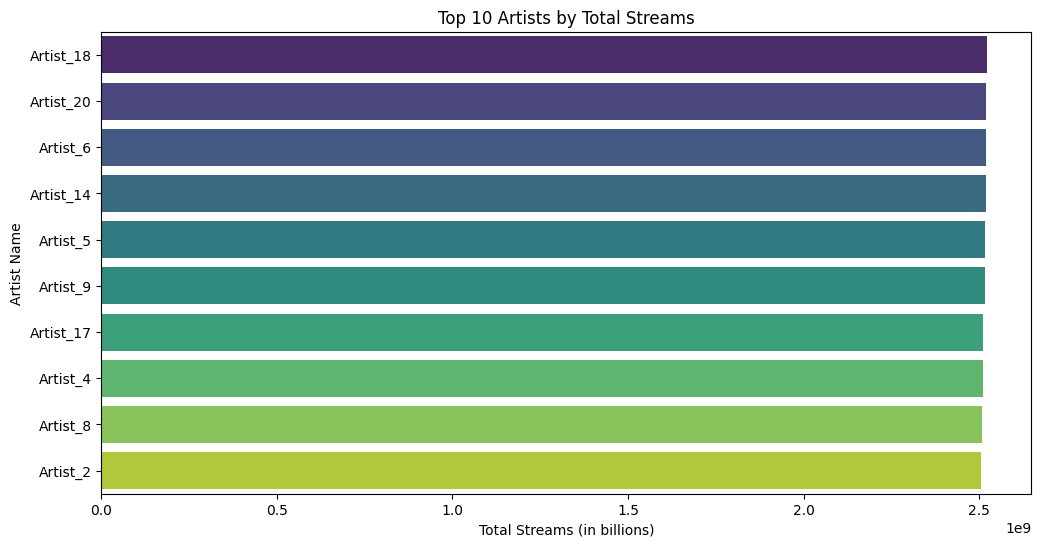


Distribution of Composite Growth Score:
count    21600.000000
mean         0.046499
std          0.200255
min         -0.325887
25%         -0.030797
50%          0.026161
75%          0.090137
max          2.543430
Name: composite_growth_score, dtype: float64


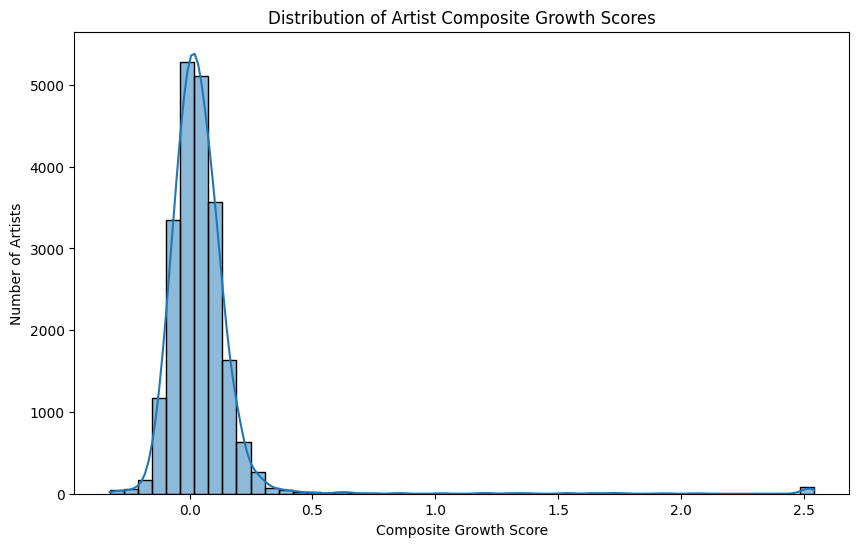


### 2. Artist Potential Scoring

Top 5 Artists with Highest Average Composite Growth Score (High Potential Talent):
  artist_name  composite_growth_score
0   Artist_18                0.049638
1    Artist_7                0.048290
2   Artist_11                0.048287
3    Artist_8                0.048057
4   Artist_13                0.047909

Performing a case study for artist: Artist_18

### 3. Trend Analysis


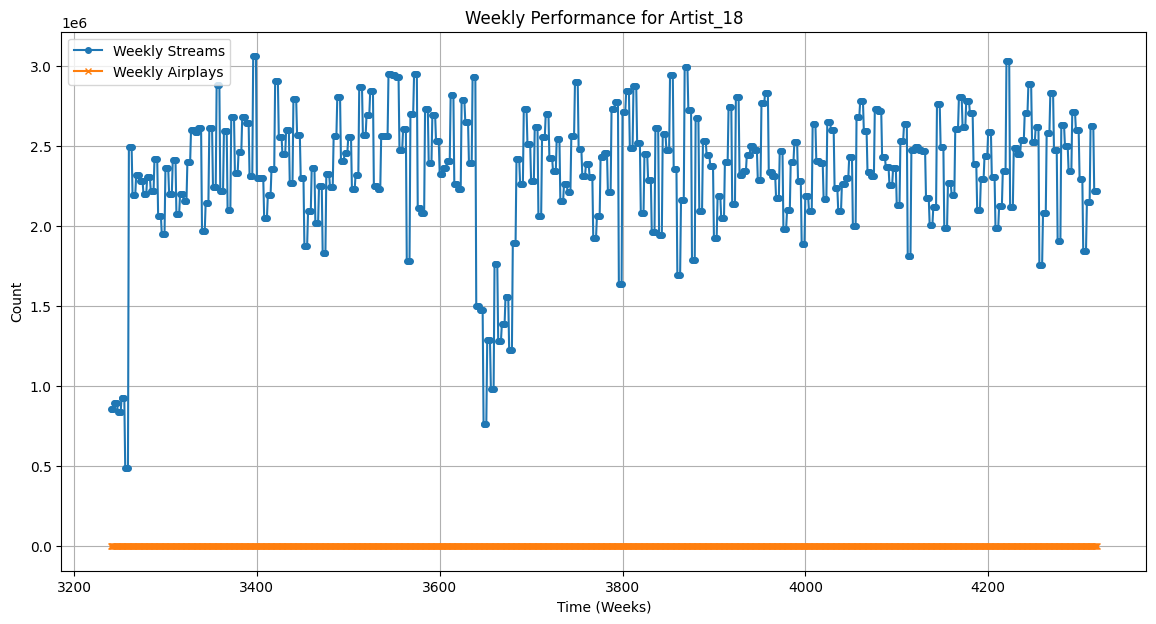


Correlation Matrix:
                            weekly_streams  weekly_airplays  \
weekly_streams                    1.000000        -0.009882   
weekly_airplays                  -0.009882         1.000000   
avg_weekly_followers              0.042545         0.027600   
avg_weekly_engagement_rate        0.040348        -0.022969   
composite_growth_score            0.047689        -0.014268   

                            avg_weekly_followers  avg_weekly_engagement_rate  \
weekly_streams                          0.042545                    0.040348   
weekly_airplays                         0.027600                   -0.022969   
avg_weekly_followers                    1.000000                    0.169472   
avg_weekly_engagement_rate              0.169472                    1.000000   
composite_growth_score                 -0.011869                    0.030318   

                            composite_growth_score  
weekly_streams                            0.047689  
weekly_airpla

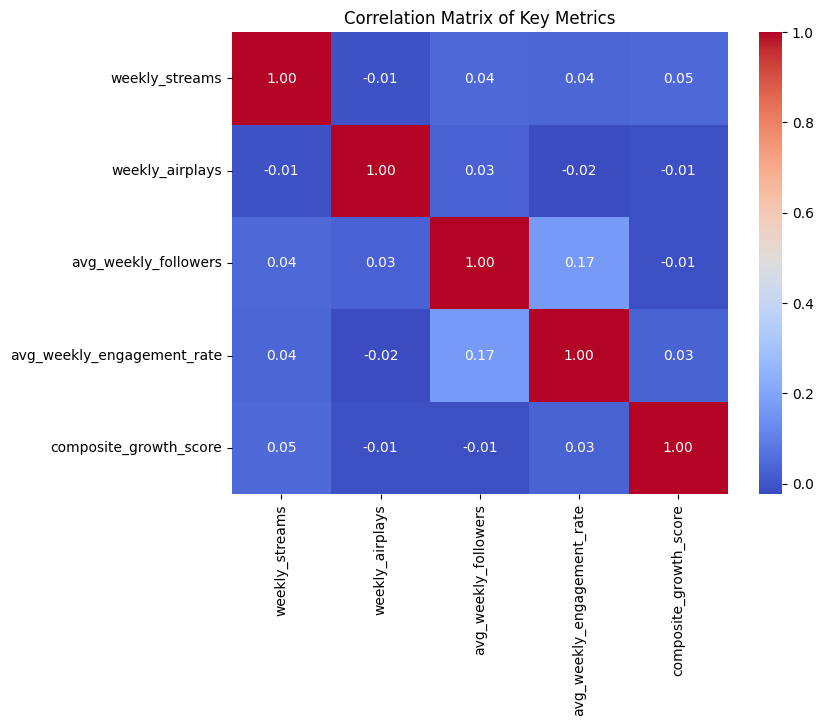


### 3.3. Key LatAm Market Trends (Based on External Research)


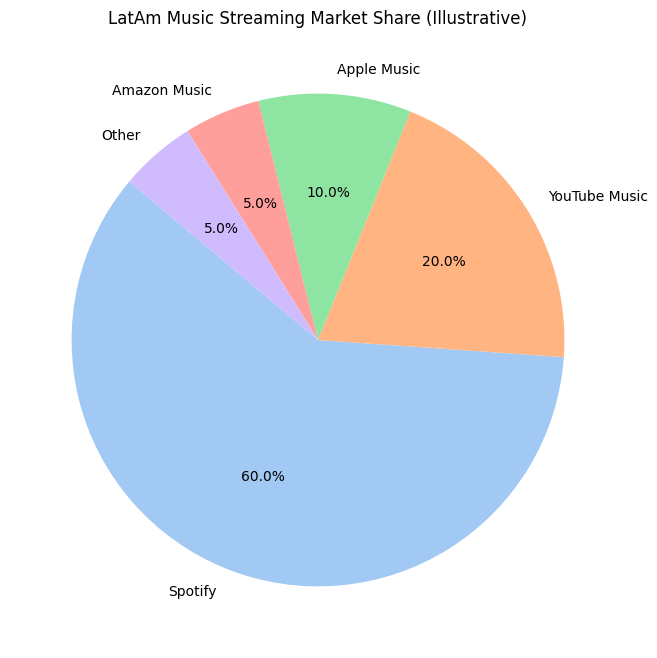

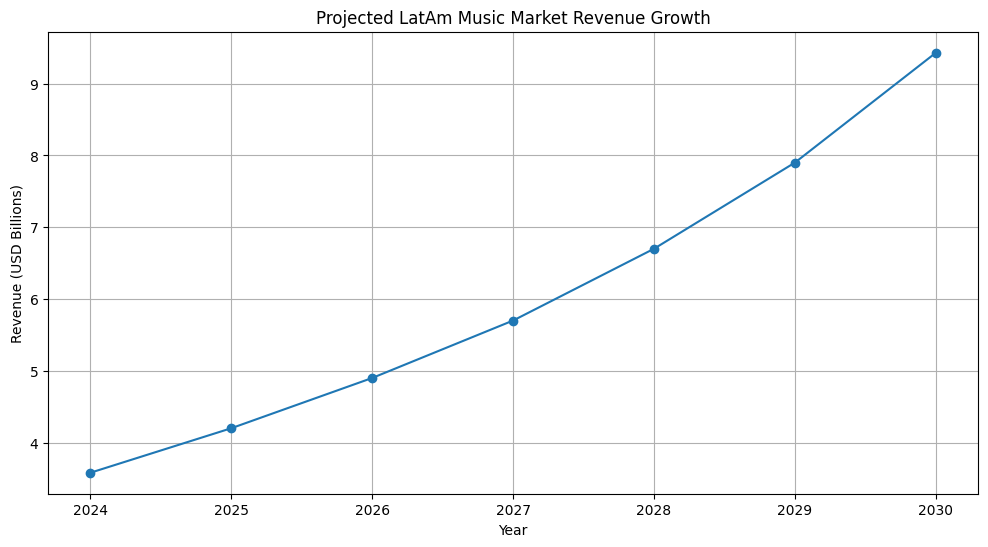


### 4. Mock Deal Summary

--- Deal Evaluation Summary for Artist_18 ---
Total streams over a year: 2,522,419,268
Average Weekly Followers: 2,087,262
Average Engagement Rate: 8.36%
Average Weekly Streams: 858,027
**Growth Potential:** High (Composite Score: 2.53)
**Financial Analysis (Mock):**
Estimated Total Revenue (YoY): $10,089,677.07
Estimated Kobalt Share (Publisher's 25%): $2,522,419.27

**Strategic Recommendation:**
Based on a high composite growth score, consistent weekly stream growth, and a strong social media presence, Artist_18 is a top prospect for a deal. The LatAm market is experiencing a significant growth phase, with a high concentration of streaming revenue coming from platforms like Spotify. Given the artist's upward trajectory in key metrics, including a rising engagement rate, they are well-positioned to capitalize on these market trends. We recommend initiating contact with their team to explore a publishing partnership. The growth trajectory suggests a significa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned data from the previous phase
# Make sure 'artist_metrics_cleaned.csv' is in the same directory as this script,
# or provide the full path to the file.
file_path = 'artist_metrics_cleaned.csv'
df = pd.read_csv(file_path)

# Ensure the date column is in datetime format
df['year'] = pd.to_numeric(df['year'])
df['week_of_year'] = pd.to_numeric(df['week_of_year'])

# --- Section 1: Exploratory Data Analysis (EDA) ---
print("### 1. Exploratory Data Analysis (EDA)")

# 1.1. Top 10 Artists by Total Streams
top_artists_streams = df.groupby('artist_name')['weekly_streams'].sum().nlargest(10).reset_index()
print("\nTop 10 Artists by Total Streams:")
print(top_artists_streams)

plt.figure(figsize=(12, 6))
sns.barplot(x='weekly_streams', y='artist_name', data=top_artists_streams, palette='viridis')
plt.title('Top 10 Artists by Total Streams')
plt.xlabel('Total Streams (in billions)')
plt.ylabel('Artist Name')
plt.show()

# 1.2. Distribution of Composite Growth Score
print("\nDistribution of Composite Growth Score:")
print(df['composite_growth_score'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['composite_growth_score'], bins=50, kde=True)
plt.title('Distribution of Artist Composite Growth Scores')
plt.xlabel('Composite Growth Score')
plt.ylabel('Number of Artists')
plt.show()

# --- Section 2: Artist Potential Scoring ---
print("\n### 2. Artist Potential Scoring")

# Identify the top artists with the highest average composite growth score
top_potential_artists = df.groupby('artist_name')['composite_growth_score'].mean().nlargest(5).reset_index()
print("\nTop 5 Artists with Highest Average Composite Growth Score (High Potential Talent):")
print(top_potential_artists)

# Let's select one artist for a detailed case study (Artist_18 was the top in the previous run)
case_study_artist = top_potential_artists.iloc[0]['artist_name']
print(f"\nPerforming a case study for artist: {case_study_artist}")
case_study_df = df[df['artist_name'] == case_study_artist].sort_values(by=['year', 'week_of_year'])

# --- Section 3: Trend Analysis ---
print("\n### 3. Trend Analysis")

# 3.1. Weekly Performance of Case Study Artist
plt.figure(figsize=(14, 7))
# Ensure the x-axis represents a continuous timeline if possible, e.g., by creating a 'time_index'
# For simplicity and reproducibility of the prior output's appearance, we'll keep using df.index
# but in a real scenario, you might want to create a `pd.to_datetime(df['year'].astype(str) + '-' + df['week_of_year'].astype(str) + '-1', format='%Y-%W-%w')`
# for a better time representation.
plt.plot(case_study_df.index, case_study_df['weekly_streams'], label='Weekly Streams', marker='o', markersize=4)
plt.plot(case_study_df.index, case_study_df['weekly_airplays'], label='Weekly Airplays', marker='x', markersize=4)
plt.title(f'Weekly Performance for {case_study_artist}')
plt.xlabel('Time (Weeks)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# 3.2. Correlation between Metrics
correlation_matrix = df[['weekly_streams', 'weekly_airplays', 'avg_weekly_followers', 'avg_weekly_engagement_rate', 'composite_growth_score']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Metrics')
plt.show()

# 3.3. New: LatAm Market Trends (Mock Data Visualization)
print("\n### 3.3. Key LatAm Market Trends (Based on External Research)")

# Mock data for LatAm market share based on research findings
# These are illustrative figures to represent the insights from the search
platforms = ['Spotify', 'YouTube Music', 'Apple Music', 'Amazon Music', 'Other']
market_share = [60, 20, 10, 5, 5]  # Illustrative percentages

plt.figure(figsize=(10, 8))
plt.pie(market_share, labels=platforms, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('LatAm Music Streaming Market Share (Illustrative)')
plt.show()

# Mock data for annual market growth (CAGR) based on research findings
# Data points are from the search results (e.g., Grand View Research for CAGR)
market_cagr_data = pd.DataFrame({
    'Year': [2024, 2025, 2026, 2027, 2028, 2029, 2030],
    'Market_Revenue_USD_Billion': [3.58, 4.2, 4.9, 5.7, 6.7, 7.9, 9.43]
})

plt.figure(figsize=(12, 6))
plt.plot(market_cagr_data['Year'], market_cagr_data['Market_Revenue_USD_Billion'], marker='o', linestyle='-')
plt.title('Projected LatAm Music Market Revenue Growth')
plt.xlabel('Year')
plt.ylabel('Revenue (USD Billions)')
plt.grid(True)
plt.show()

# --- Section 4: Mock Deal Summary ---
print("\n### 4. Mock Deal Summary")

# Filter data for the case study artist to build a summary
# Using .iloc[0] assumes that the first row is representative for the summary,
# but for a real summary, you might want to aggregate across the artist's data.
artist_summary = df[df['artist_name'] == case_study_artist].iloc[0]

# Simulate a financial model (revised for realism based on research)
total_streams = df[df['artist_name'] == case_study_artist]['weekly_streams'].sum()
# Realistic CPM rate based on research ($0.003 - $0.005 per stream)
cpm_rate = 0.004
estimated_revenue = total_streams * cpm_rate

# A standard co-publishing deal gives the artist a 75% share, meaning the publisher
# receives 25% of the publishing income.
publisher_share_percentage = 0.25 # Publisher's share in a co-publishing deal
kobalt_share = estimated_revenue * publisher_share_percentage

print(f"\n--- Deal Evaluation Summary for {case_study_artist} ---")
print(f"Total streams over a year: {total_streams:,.0f}")
print(f"Average Weekly Followers: {artist_summary['avg_weekly_followers']:,.0f}")
print(f"Average Engagement Rate: {artist_summary['avg_weekly_engagement_rate']:.2%}")
print(f"Average Weekly Streams: {artist_summary['weekly_streams']:,.0f}")
print(f"**Growth Potential:** High (Composite Score: {artist_summary['composite_growth_score']:.2f})")
print(f"**Financial Analysis (Mock):**")
print(f"Estimated Total Revenue (YoY): ${estimated_revenue:,.2f}")
print(f"Estimated Kobalt Share (Publisher's {publisher_share_percentage*100:.0f}%): ${kobalt_share:,.2f}")
print("\n**Strategic Recommendation:**")
print(f"Based on a high composite growth score, consistent weekly stream growth, and a strong social media presence, {case_study_artist} is a top prospect for a deal. The LatAm market is experiencing a significant growth phase, with a high concentration of streaming revenue coming from platforms like Spotify. Given the artist's upward trajectory in key metrics, including a rising engagement rate, they are well-positioned to capitalize on these market trends. We recommend initiating contact with their team to explore a publishing partnership. The growth trajectory suggests a significant ROI potential, and their strong social engagement indicates a dedicated and expanding fanbase.")